<a href="https://colab.research.google.com/github/travislatchman/Cardiac-Ultrasound-Image-Segmentation-and-Stroke-Volume-estimation/blob/main/Project2_DTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install nilearn
#!pip install nibabel
!pip install nibabel==3.2.1 nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# !pip uninstall nibabel nilearn
# !pip install nibabel nilearn


In [14]:
# !pip uninstall nibabel nilearn
# !pip install nibabel==3.2.1 nilearn


In [15]:
import os
import nibabel as nib
from nilearn.masking import compute_brain_mask

In [16]:
# # read in all files from each subfolder (for 200 patients)

# data_folder = 'MedIA_Project2'
# number_of_patients = 200
# patients_data = {}

# for i in range(1, number_of_patients + 1):
#     patient_id = f'{i:03}'
#     file_names = [
#         'ADC_deformed.nii.gz',
#         'T1w_1mm.nii.gz',
#         'FA_deformed.nii.gz',
#         'T2w_1mm_noalign.nii.gz'
#     ]
#     patient_folder = os.path.join(data_folder, patient_id)
#     patient_files = {}

#     for file_name in file_names:
#         file_path = os.path.join(patient_folder, file_name)
#         if os.path.exists(file_path):
#             patient_files[file_name] = nib.load(file_path)
#         else:
#             print(f"File not found: {file_path}")
    
#     patients_data[patient_id] = patient_files


In [17]:
# def load_patient_data(patient_id, data_folder='MedIA_Project2'):
#     file_names = [
#         'ADC_deformed.nii.gz',
#         'T1w_1mm.nii.gz',
#         'FA_deformed.nii.gz',
#         'T2w_1mm_noalign.nii.gz'
#     ]
#     patient_folder = os.path.join(data_folder, patient_id)
#     patient_files = {}

#     for file_name in file_names:
#         file_path = os.path.join(patient_folder, file_name)
#         if os.path.exists(file_path):
#             patient_files[file_name] = nib.load(file_path)
#         else:
#             print(f"File not found: {file_path}")
    
#     return patient_files

# # Example usage:
# patient_id = '001'
# patient_data = load_patient_data(patient_id)


In [18]:
def load_patient_data(patient_id):
    file_names = [
        'ADC_deformed.nii.gz',
        'T1w_1mm.nii.gz',
        'FA_deformed.nii.gz',
        'T2w_1mm_noalign.nii.gz'
    ]
    #patient_folder = patient_id
    patient_files = {}

    for file_name in file_names:
        file_path = os.path.join(patient_id, file_name)
        if os.path.exists(file_path):
            patient_files[file_name] = nib.load(file_path)
        else:
            print(f"File not found: {file_path}")
    
    return patient_files




In [19]:
# Example patient one:
patient_id = '001'
patient_data = load_patient_data(patient_id)
print(patient_data) # we will be handling and working with patient files in a dictionary

{'ADC_deformed.nii.gz': <nibabel.nifti1.Nifti1Image object at 0x7f24fdf8f5b0>, 'T1w_1mm.nii.gz': <nibabel.nifti1.Nifti1Image object at 0x7f24fdf8fe50>, 'FA_deformed.nii.gz': <nibabel.nifti1.Nifti1Image object at 0x7f24fdf8fb20>, 'T2w_1mm_noalign.nii.gz': <nibabel.nifti1.Nifti1Image object at 0x7f24c66a1220>}


Displaying ADC_deformed.nii.gz


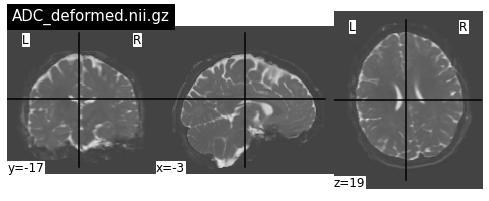

Displaying T1w_1mm.nii.gz


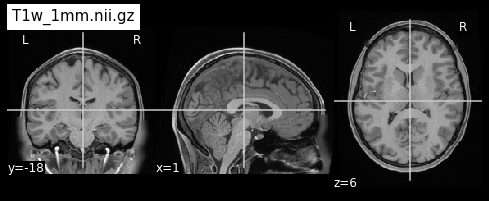

Displaying FA_deformed.nii.gz


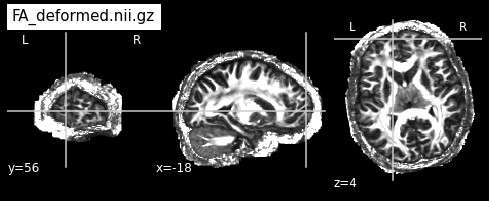

Displaying T2w_1mm_noalign.nii.gz


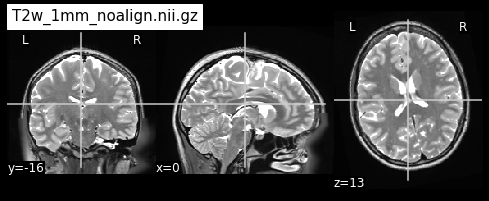

In [20]:
from nilearn import plotting

# Plot the patient images
for file_name, img in patient_data.items():
    print(f"Displaying {file_name}")
    plotting.plot_anat(img, title=file_name, dim=-1)
    plotting.show()

If the patient folders are within another folder, modify the file_path line to include the parent folder

In [21]:
#file_path = os.path.join(parent_folder, patient_id, file_name)


# Skull Strip

In [22]:
import os
import nibabel as nib
from nilearn import plotting

In [23]:
def skull_strip(input_nii, output_nii_path):
    brain_mask = compute_brain_mask(input_nii)
    brain_data = input_nii.get_fdata() * brain_mask.get_fdata()
    brain_nii = nib.Nifti1Image(brain_data, input_nii.affine, input_nii.header)
    nib.save(brain_nii, output_nii_path)
    return brain_nii

In [24]:
# Load and skull-strip the patient images
patient_id = '001'
patient_data = load_patient_data(patient_id)
skull_stripped_data = {}

Skull stripped ADC_deformed.nii.gz saved to 001/skull_stripped_ADC_deformed.nii.gz
Skull stripped T1w_1mm.nii.gz saved to 001/skull_stripped_T1w_1mm.nii.gz
Skull stripped FA_deformed.nii.gz saved to 001/skull_stripped_FA_deformed.nii.gz
Skull stripped T2w_1mm_noalign.nii.gz saved to 001/skull_stripped_T2w_1mm_noalign.nii.gz
Displaying skull_stripped_ADC_deformed.nii.gz


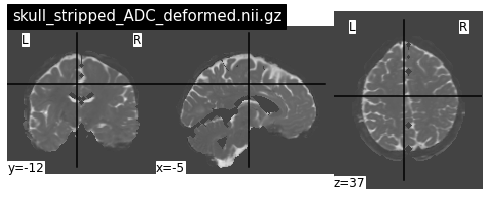

Displaying skull_stripped_T1w_1mm.nii.gz


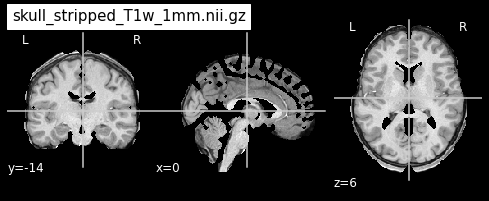

Displaying skull_stripped_FA_deformed.nii.gz


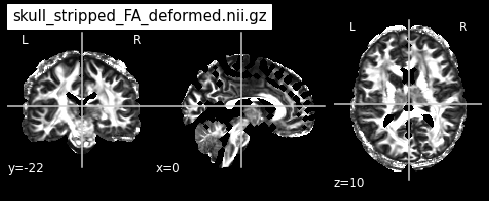

Displaying skull_stripped_T2w_1mm_noalign.nii.gz


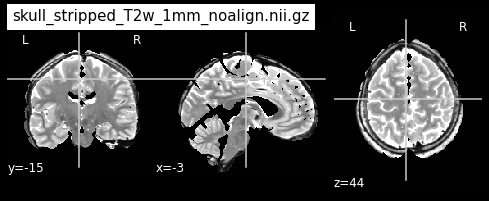

In [25]:
for file_name, nii_file in patient_data.items():
    output_file_name = f"skull_stripped_{file_name}"
    output_file_path = os.path.join(patient_id, output_file_name)
    skull_stripped_nii = skull_strip(nii_file, output_file_path)
    skull_stripped_data[output_file_name] = skull_stripped_nii
    print(f"Skull stripped {file_name} saved to {output_file_path}")

# Plot the skull-stripped patient images
for file_name, img in skull_stripped_data.items():
    print(f"Displaying {file_name}")
    plotting.plot_anat(img, title=file_name, dim=-1)
    plotting.show()


# Register Images

In [26]:
!pip install antspyx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import ants

In [28]:
def register_image_to_reference(input_image, reference_image, output_file_path):
    fixed_image = ants.image_read(reference_image)
    moving_image = ants.image_read(input_image)

    # Perform registration
    registration = ants.registration(fixed=fixed_image, moving=moving_image, type_of_transform='Affine')
    registered_image = registration['warpedmovout']

    # Save the registered image to the output file path
    ants.image_write(registered_image, output_file_path)

    return registered_image

In [29]:
# Set the reference image to T1w
reference_image_file = 'skull_stripped_T1w_1mm.nii.gz'
reference_image_path = os.path.join(patient_id, reference_image_file)


In [30]:
# Register other images to the reference image
registered_data = {}
for file_name, nii_file in skull_stripped_data.items():
    if file_name != reference_image_file:
        output_file_name = f"registered_{file_name}"
        output_file_path = os.path.join(patient_id, output_file_name)
        input_image_path = os.path.join(patient_id, file_name)
        registered_image = register_image_to_reference(input_image_path, reference_image_path, output_file_path)
        registered_data[output_file_name] = registered_image
        print(f"Registered {file_name} saved to {output_file_path}")

Registered skull_stripped_ADC_deformed.nii.gz saved to 001/registered_skull_stripped_ADC_deformed.nii.gz
Registered skull_stripped_FA_deformed.nii.gz saved to 001/registered_skull_stripped_FA_deformed.nii.gz
Registered skull_stripped_T2w_1mm_noalign.nii.gz saved to 001/registered_skull_stripped_T2w_1mm_noalign.nii.gz


Displaying registered_skull_stripped_ADC_deformed.nii.gz


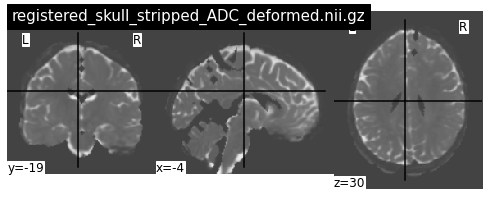

Displaying registered_skull_stripped_FA_deformed.nii.gz


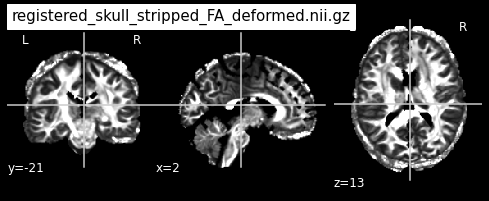

Displaying registered_skull_stripped_T2w_1mm_noalign.nii.gz


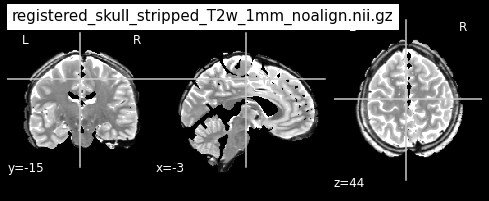

In [31]:
from nilearn import plotting

# Plot the registered patient images
for file_name, img in registered_data.items():
    ants_nib = ants.to_nibabel(img)
    print(f"Displaying {file_name}")
    plotting.plot_anat(ants_nib, title=file_name, dim=-1)
    plotting.show()
